<a href="https://colab.research.google.com/github/kaysriram/MLZoomCamp2025/blob/main/DataTalksHW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-04 13:16:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-11-04 13:16:56 (18.4 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv('/content/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df=df.fillna(0)

In [5]:
df.isnull().sum()

,0
engine_displacement,0
num_cylinders,0
horsepower,0
vehicle_weight,0
acceleration,0
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,0


Data Preparation

In [6]:
X=df.drop(columns=['fuel_efficiency_mpg'])
y=df['fuel_efficiency_mpg']
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.4,random_state=1)      #60 40 split
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=1)

In [7]:
from sklearn.feature_extraction import DictVectorizer

In [8]:
# Convert dataframes to dictionaries
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

# Initialize and fit DictVectorizer on the training data
dv = DictVectorizer(sparse=True)
X_train_dv = dv.fit_transform(train_dicts)

# Transform validation and test data
X_val_dv = dv.transform(val_dicts)
X_test_dv = dv.transform(test_dicts)

Q1.Fitting Decision Tree Regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor,export_text
from sklearn.metrics import mean_squared_error

In [ ]:
model=DecisionTreeRegressor(max_depth=1)
model.fit(X_train_dv,y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
print(export_text(model, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3028.82
|   |--- value: [16.86]
|--- vehicle_weight >  3028.82
|   |--- value: [12.87]



Q2. Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
model=RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
model.fit(X_train_dv,y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [ ]:
val_preds=model.predict(X_val_dv)
mse = mean_squared_error(y_val,val_preds)
print(f'The RMSE is: {np.sqrt(mse)}')

The RMSE is: 0.4602815367032658


In [ ]:
for i in range(10,201,10):
  model=RandomForestRegressor(n_estimators=i,random_state=1,n_jobs=-1)
  model.fit(X_train_dv,y_train)
  val_preds=model.predict(X_val_dv)
  mse = mean_squared_error(y_val,val_preds)
  print(f'The RMSE for {i} is: {round(np.sqrt(mse),3)}')

The RMSE for 10 is: 0.46
The RMSE for 20 is: 0.446
The RMSE for 30 is: 0.44
The RMSE for 40 is: 0.438
The RMSE for 50 is: 0.437
The RMSE for 60 is: 0.436
The RMSE for 70 is: 0.436
The RMSE for 80 is: 0.436
The RMSE for 90 is: 0.435
The RMSE for 100 is: 0.435
The RMSE for 110 is: 0.435
The RMSE for 120 is: 0.435
The RMSE for 130 is: 0.435
The RMSE for 140 is: 0.435
The RMSE for 150 is: 0.435
The RMSE for 160 is: 0.435
The RMSE for 170 is: 0.435
The RMSE for 180 is: 0.435
The RMSE for 190 is: 0.435
The RMSE for 200 is: 0.435


In [ ]:
res=[]
for max_depth in [10, 15, 20, 25]:
  for n_estimators in range(10,201,10):
    model=RandomForestRegressor(n_estimators=n_estimators,random_state=1,n_jobs=-1,max_depth=max_depth)
    model.fit(X_train_dv,y_train)
    val_preds=model.predict(X_val_dv)
    rmse = np.sqrt(mean_squared_error(y_val,val_preds))
    res.append({
            "max_depth": max_depth,
            "n_estimators": n_estimators,
            "rmse": rmse
        })

    print(f"max_depth={max_depth}, n_estimators={n_estimators}, RMSE={rmse:.3f}")


max_depth=10, n_estimators=10, RMSE=0.451
max_depth=10, n_estimators=20, RMSE=0.443
max_depth=10, n_estimators=30, RMSE=0.438
max_depth=10, n_estimators=40, RMSE=0.437
max_depth=10, n_estimators=50, RMSE=0.436
max_depth=10, n_estimators=60, RMSE=0.435
max_depth=10, n_estimators=70, RMSE=0.435
max_depth=10, n_estimators=80, RMSE=0.435
max_depth=10, n_estimators=90, RMSE=0.435
max_depth=10, n_estimators=100, RMSE=0.435
max_depth=10, n_estimators=110, RMSE=0.434
max_depth=10, n_estimators=120, RMSE=0.434
max_depth=10, n_estimators=130, RMSE=0.434
max_depth=10, n_estimators=140, RMSE=0.434
max_depth=10, n_estimators=150, RMSE=0.435
max_depth=10, n_estimators=160, RMSE=0.435
max_depth=10, n_estimators=170, RMSE=0.434
max_depth=10, n_estimators=180, RMSE=0.434
max_depth=10, n_estimators=190, RMSE=0.434
max_depth=10, n_estimators=200, RMSE=0.434
max_depth=15, n_estimators=10, RMSE=0.462
max_depth=15, n_estimators=20, RMSE=0.447
max_depth=15, n_estimators=30, RMSE=0.441
max_depth=15, n_estimat

In [ ]:
results_df = pd.DataFrame(res)
results_df.groupby('max_depth')['rmse'].mean()



,rmse
max_depth,
10,0.436247
15,0.437825
20,0.437693
25,0.437653


Q5 Feature Importance

In [12]:
model=RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1,n_jobs=-1)
model.fit(X_train_dv,y_train)
model.feature_importances_

array([1.14423137e-02, 3.42836185e-04, 2.76784327e-04, 3.15942403e-03,
       3.49188882e-04, 3.07187142e-04, 1.59334815e-02, 3.06605677e-03,
       2.32314491e-03, 1.57562918e-03, 4.30947624e-04, 4.18853039e-04,
       4.95938369e-04, 9.59878214e-01])

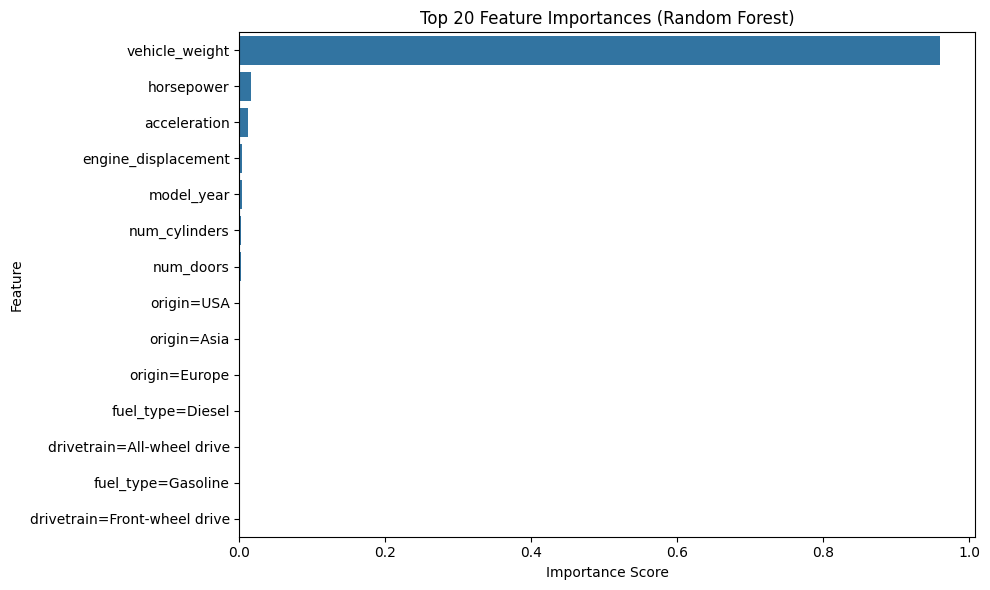

In [14]:
importances = model.feature_importances_
feature_names = dv.get_feature_names_out()

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))  # top 20 features
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Q6

In [15]:
!pip install xgboost

In [20]:
import xgboost as xgb
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train_dv, label=y_train, feature_names=features)
dvalid = xgb.DMatrix(X_val_dv, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
result={}
for e in [0.1,0.3]:
  xgb_params = {
      'eta': e,
      'max_depth': 6,
      'min_child_weight': 1,

      'objective': 'reg:squarederror',
      'nthread': 8,

      'seed': 1,
      'verbosity': 1,
  }
  xgb_model = xgb.train(
          xgb_params,
          dtrain,
          num_boost_round=100,
          evals=watchlist,
          verbose_eval=False
      )

  preds = xgb_model.predict(dvalid)
  rmse = np.sqrt(mean_squared_error(y_val, preds))
  result[e]=rmse
  print(f"Validation RMSE for eta={e}: {rmse:.4f}")

print(min(result,key=result.get))

Validation RMSE for eta=0.1: 0.4167
Validation RMSE for eta=0.3: 0.4434
0.1
